# Students CGPA Prediction Project

In [3]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the dataset
df=pd.read_csv('Grades.csv')
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [5]:
df.shape

(571, 43)

In [6]:
df.columns.to_list()

['Seat No.',
 'PH-121',
 'HS-101',
 'CY-105',
 'HS-105/12',
 'MT-111',
 'CS-105',
 'CS-106',
 'EL-102',
 'EE-119',
 'ME-107',
 'CS-107',
 'HS-205/20',
 'MT-222',
 'EE-222',
 'MT-224',
 'CS-210',
 'CS-211',
 'CS-203',
 'CS-214',
 'EE-217',
 'CS-212',
 'CS-215',
 'MT-331',
 'EF-303',
 'HS-304',
 'CS-301',
 'CS-302',
 'TC-383',
 'MT-442',
 'EL-332',
 'CS-318',
 'CS-306',
 'CS-312',
 'CS-317',
 'CS-403',
 'CS-421',
 'CS-406',
 'CS-414',
 'CS-419',
 'CS-423',
 'CS-412',
 'CGPA']

In [7]:
df.dtypes

Seat No.      object
PH-121        object
HS-101        object
CY-105        object
HS-105/12     object
MT-111        object
CS-105        object
CS-106        object
EL-102        object
EE-119        object
ME-107        object
CS-107        object
HS-205/20     object
MT-222        object
EE-222        object
MT-224        object
CS-210        object
CS-211        object
CS-203        object
CS-214        object
EE-217        object
CS-212        object
CS-215        object
MT-331        object
EF-303        object
HS-304        object
CS-301        object
CS-302        object
TC-383        object
MT-442        object
EL-332        object
CS-318        object
CS-306        object
CS-312        object
CS-317        object
CS-403        object
CS-421        object
CS-406        object
CS-414        object
CS-419        object
CS-423        object
CS-412        object
CGPA         float64
dtype: object

In [8]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


# Checking Null Values

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

<Axes: >

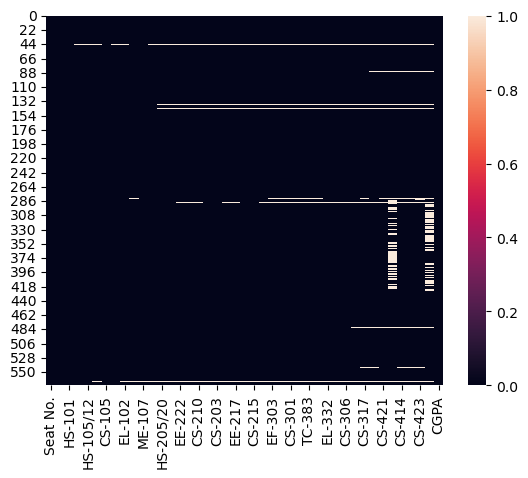

In [11]:
sns.heatmap(df.isnull())

Rows containing the null values should be dropped because if we replace it with mean/median values, it will distort the dataset.

In [12]:
df_new=df.dropna(axis=0)

In [13]:
df_new

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In [14]:
417/571*100

73.02977232924694

In [15]:
for i in df.columns:
    print("No of Unique values in ",i," : ",df[i].nunique(),"\n")

No of Unique values in  Seat No.  :  571 

No of Unique values in  PH-121  :  13 

No of Unique values in  HS-101  :  12 

No of Unique values in  CY-105  :  13 

No of Unique values in  HS-105/12  :  13 

No of Unique values in  MT-111  :  13 

No of Unique values in  CS-105  :  11 

No of Unique values in  CS-106  :  13 

No of Unique values in  EL-102  :  13 

No of Unique values in  EE-119  :  12 

No of Unique values in  ME-107  :  13 

No of Unique values in  CS-107  :  14 

No of Unique values in  HS-205/20  :  13 

No of Unique values in  MT-222  :  14 

No of Unique values in  EE-222  :  13 

No of Unique values in  MT-224  :  14 

No of Unique values in  CS-210  :  14 

No of Unique values in  CS-211  :  14 

No of Unique values in  CS-203  :  13 

No of Unique values in  CS-214  :  13 

No of Unique values in  EE-217  :  13 

No of Unique values in  CS-212  :  12 

No of Unique values in  CS-215  :  14 

No of Unique values in  MT-331  :  12 

No of Unique values in  EF-303 

In [16]:
for i in df.columns:
    print(df[i].value_counts())

CS-97001    1
CS-97384    1
CS-97378    1
CS-97379    1
CS-97380    1
           ..
CS-97185    1
CS-97184    1
CS-97183    1
CS-97182    1
CS-97571    1
Name: Seat No., Length: 571, dtype: int64
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64
A     151
A-    134
B+     60
B      51
A+     43
B

# Replacing Grade with Credit points

In [22]:
df_new.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [33]:
for i in df_new.columns:
    df_new[i]=df_new[i].replace(['A+','A-','A','B','B+','B-','C','C+','C-','D','D+','F','W','WU','I'], [4,3.7,4,3,3.3,2.7,2,2.3,1.7,1,1.3,0,0,0,0])

In [34]:
df_new

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,...,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0,3.798
567,CS-97568,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,...,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7,3.772
568,CS-97569,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,...,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7,3.470
569,CS-97570,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,...,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0,2.193


In [32]:
df_new.head(5)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,CS-97002,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,CS-97003,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,CS-97004,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,CS-97005,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   417 non-null    object 
 1   PH-121     417 non-null    float64
 2   HS-101     417 non-null    float64
 3   CY-105     417 non-null    float64
 4   HS-105/12  417 non-null    float64
 5   MT-111     417 non-null    float64
 6   CS-105     417 non-null    float64
 7   CS-106     417 non-null    float64
 8   EL-102     417 non-null    float64
 9   EE-119     417 non-null    float64
 10  ME-107     417 non-null    float64
 11  CS-107     417 non-null    float64
 12  HS-205/20  417 non-null    float64
 13  MT-222     417 non-null    float64
 14  EE-222     417 non-null    float64
 15  MT-224     417 non-null    float64
 16  CS-210     417 non-null    float64
 17  CS-211     417 non-null    float64
 18  CS-203     417 non-null    float64
 19  CS-214     417 non-null    float64
 20  EE-217    

In [36]:
df_new.drop(['Seat No.'],axis=1,inplace=True)

In [37]:
df_new.head(15)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3,1.906
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0,3.448
5,4.0,2.7,3.0,1.3,2.3,3.7,2.3,3.0,3.3,3.3,...,2.0,2.7,2.3,2.3,3.7,3.7,3.3,2.7,3.0,3.026
6,2.7,1.7,3.7,1.0,3.7,3.0,4.0,3.3,3.7,3.3,...,2.7,2.0,3.3,2.7,4.0,3.7,3.3,3.3,4.0,2.957
7,3.3,3.3,2.3,2.0,2.0,3.7,1.7,3.7,3.0,3.7,...,1.3,3.3,3.3,2.0,4.0,3.3,3.7,3.7,3.7,3.043
8,3.7,2.0,3.7,1.3,3.0,3.7,3.7,3.7,3.3,3.7,...,3.3,3.0,2.7,2.3,4.0,3.7,3.3,3.7,4.0,3.358
9,4.0,3.0,2.3,3.0,3.0,3.7,2.0,2.7,3.7,4.0,...,2.3,2.7,3.3,2.7,4.0,4.0,3.7,3.0,4.0,3.247


In [38]:
df_new.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,...,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,3.313669,2.628058,3.436211,2.962590,2.944844,3.545084,2.872902,2.940288,3.170743,2.816067,...,2.646043,2.696403,3.116307,2.405036,3.299281,3.369065,3.057554,2.726619,3.241487,2.990386
std,0.761565,0.890065,0.762592,1.002517,0.914876,0.644415,0.907241,0.913209,0.726727,0.989078,...,0.973169,0.875775,0.859435,0.890683,0.832036,0.735453,0.748458,0.891324,0.801369,0.578246
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.708000
25%,3.000000,2.000000,3.300000,2.300000,2.300000,3.300000,2.300000,2.300000,2.700000,2.000000,...,1.700000,2.000000,2.700000,1.700000,3.000000,3.000000,2.700000,2.000000,3.000000,2.603000
50%,3.700000,2.700000,3.700000,3.300000,3.000000,3.700000,3.000000,3.000000,3.300000,3.000000,...,2.700000,2.700000,3.300000,2.300000,3.700000,3.700000,3.300000,3.000000,3.700000,3.033000
75%,4.000000,3.300000,4.000000,4.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.700000,...,3.700000,3.300000,4.000000,3.000000,3.700000,4.000000,3.700000,3.700000,3.700000,3.452000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.985000


In [42]:
x = df_new.drop("CGPA", axis = 1)
y= df_new['CGPA']

In [43]:
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,2.7,1.3,1.7,2.0,1.7,1.3,1.0,1.7,2.7,1.7,...,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7
1,4.0,1.0,1.3,1.0,2.7,2.0,1.0,4.0,1.3,1.0,...,1.0,1.3,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0
2,4.0,3.0,4.0,2.7,3.3,4.0,2.7,3.3,3.7,3.7,...,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0
3,1.0,2.3,1.3,1.0,1.0,3.7,1.3,1.7,1.0,2.3,...,1.7,1.3,2.0,1.3,1.7,2.7,3.0,2.3,2.3,2.3
4,3.7,3.7,3.7,3.3,4.0,4.0,3.7,3.3,4.0,3.7,...,3.7,2.7,3.3,3.3,2.7,3.7,4.0,3.7,3.7,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,4.0,4.0,3.7,4.0,4.0,3.7,3.7,4.0,3.3,...,3.3,3.7,3.7,4.0,4.0,4.0,3.3,3.3,3.0,4.0
567,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,4.0,...,3.7,3.3,3.3,4.0,4.0,3.7,3.0,3.7,2.0,3.7
568,3.0,4.0,3.7,3.3,4.0,4.0,4.0,4.0,4.0,3.0,...,3.3,3.7,3.0,4.0,3.3,4.0,2.0,3.3,3.7,3.7
569,4.0,3.3,1.0,4.0,1.0,1.3,2.7,1.7,2.7,1.7,...,3.3,1.0,3.0,3.0,1.7,1.0,2.0,3.0,2.7,2.0


In [44]:
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 417, dtype: float64

# MODEL BUILDING

Finding best random state

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [47]:
maxAcc = 0
maxRS= 0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print("The best r2_score is ", maxAcc, "at random state ", maxRS)

The best r2_score is  0.9986675801858421 at random state  130


# Train Test split

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

# Regression Algorithms

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [50]:
#checking accuracy for LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
pred_train_LR = LR.predict(x_train)
print('R2_score : ', r2_score(y_test,predLR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLR))
print('Mean Squared Error : ', mean_squared_error(y_test,predLR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLR)))

R2_score :  99.8667580185842
R2_score on training data :  99.80141766760251
Mean Absolute Error :  0.017014822779318303
Mean Squared Error :  0.0005135865047473879
Root Mean Squared Error :  0.022662447015876018


In [51]:
#checking accuracy for RandomForestRegressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR = RFR.predict(x_test)
pred_train_RFR = RFR.predict(x_train)
print('R2_score : ', r2_score(y_test,predRFR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RFR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRFR))
print('Mean Squared Error : ', mean_squared_error(y_test,predRFR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRFR)))

R2_score :  96.24065855495068
R2_score on training data :  99.21800033376708
Mean Absolute Error :  0.0911389682539678
Mean Squared Error :  0.014490530780158646
Root Mean Squared Error :  0.12037662057126644


In [52]:
#checking accuracy for ExtraTreesRegressor
ETC = ExtraTreesRegressor()
ETC.fit(x_train,y_train)
predETC = ETC.predict(x_test)
pred_train_ETC = ETC.predict(x_train)
print('R2_score : ', r2_score(y_test,predETC)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ETC)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predETC))
print('Mean Squared Error : ', mean_squared_error(y_test,predETC))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predETC)))

R2_score :  96.96255186525063
R2_score on training data :  100.0
Mean Absolute Error :  0.08344246031745997
Mean Squared Error :  0.011707964369047552
Root Mean Squared Error :  0.10820334730981086


In [53]:
#checking accuracy for GradientBoostingRegressor
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR = GBR.predict(x_test)
pred_train_GBR = GBR.predict(x_train)
print('R2_score : ', r2_score(y_test,predGBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_GBR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predGBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predGBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predGBR)))

R2_score :  96.85442816226278
R2_score on training data :  99.88679794011851
Mean Absolute Error :  0.08334928749165146
Mean Squared Error :  0.012124731472837382
Root Mean Squared Error :  0.11011235840194043


In [54]:
#checking accuracy for AdaBoostRegressor
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
predABR = ABR.predict(x_test)
pred_train_ABR = ABR.predict(x_train)
print('R2_score : ', r2_score(y_test,predABR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_ABR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predABR))
print('Mean Squared Error : ', mean_squared_error(y_test,predABR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predABR)))

R2_score :  92.96050159272768
R2_score on training data :  95.8865712802537
Mean Absolute Error :  0.13782433651358217
Mean Squared Error :  0.02713402595600601
Root Mean Squared Error :  0.16472409039362157


In [55]:
#checking accuracy for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
predBR = BR.predict(x_test)
pred_train_BR = BR.predict(x_train)
print('R2_score : ', r2_score(y_test,predBR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_BR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predBR))
print('Mean Squared Error : ', mean_squared_error(y_test,predBR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predBR)))

R2_score :  94.97407272809633
R2_score on training data :  98.20422547173698
Mean Absolute Error :  0.11140396825396821
Mean Squared Error :  0.019372636111111105
Root Mean Squared Error :  0.13918561747217673


In [56]:
#checking accuracy for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR = DTR.predict(x_test)
pred_train_DTR = DTR.predict(x_train)
print('R2_score : ', r2_score(y_test,predDTR)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_DTR)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predDTR))
print('Mean Squared Error : ', mean_squared_error(y_test,predDTR))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predDTR)))

R2_score :  85.64706015582533
R2_score on training data :  100.0
Mean Absolute Error :  0.17124603174603176
Mean Squared Error :  0.055323976190476194
Root Mean Squared Error :  0.23521049336812377


In [57]:
#checking accuracy for KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN = KNN.predict(x_test)
pred_train_KNN = KNN.predict(x_train)
print('R2_score : ', r2_score(y_test,predKNN)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_KNN)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predKNN))
print('Mean Squared Error : ', mean_squared_error(y_test,predKNN))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predKNN)))

R2_score :  97.38569166021513
R2_score on training data :  97.7373926936308
Mean Absolute Error :  0.08336031746031747
Mean Squared Error :  0.010076955238095247
Root Mean Squared Error :  0.10038403876162409


In [58]:
#checking accuracy for Lasso
LA = Lasso()
LA.fit(x_train,y_train)
predLA = LA.predict(x_test)
pred_train_LA = LA.predict(x_train)
print('R2_score : ', r2_score(y_test,predLA)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_LA)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predLA))
print('Mean Squared Error : ', mean_squared_error(y_test,predLA))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predLA)))

R2_score :  -1.5123469186248073
R2_score on training data :  0.0
Mean Absolute Error :  0.5358127965963017
Mean Squared Error :  0.3912833694655741
Root Mean Squared Error :  0.6255264738327021


In [59]:
#checking accuracy for Ridge
RD = Ridge()
RD.fit(x_train,y_train)
predRD = RD.predict(x_test)
pred_train_RD = RD.predict(x_train)
print('R2_score : ', r2_score(y_test,predRD)*100)
print('R2_score on training data : ', r2_score(y_train,pred_train_RD)*100)
print('Mean Absolute Error : ', mean_absolute_error(y_test,predRD))
print('Mean Squared Error : ', mean_squared_error(y_test,predRD))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,predRD)))

R2_score :  99.86715429147857
R2_score on training data :  99.80137610872355
Mean Absolute Error :  0.016967867386541727
Mean Squared Error :  0.0005120590551509495
Root Mean Squared Error :  0.022628721907146005


# CROSS VALIDATION

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
#checking CV score for LinearRegression

score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLR) - score.mean())*100)

[0.99753016 0.99837823 0.99650263 0.99560163 0.99729789]
0.9970621070986401
Difference between R2_score score and CV score is  0.16054730872020473


In [62]:
#checking CV score for RandomForestRegressor

score = cross_val_score(RFR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRFR) - score.mean())*100)

[0.94532535 0.94240615 0.94915262 0.96562995 0.92288285]
0.9450793823104962
Difference between R2_score score and CV score is  1.7327203239010713


In [63]:
#checking CV score for ExtraTreesRegressor

score = cross_val_score(ETC,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predETC) - score.mean())*100)

[0.95118127 0.95298505 0.96809701 0.97356417 0.94870321]
0.9589061415983586
Difference between R2_score score and CV score is  1.0719377054147716


In [64]:
#checking CV score for GradientBoostingRegressor

score = cross_val_score(GBR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predGBR) - score.mean())*100)

[0.94098953 0.96300233 0.96573127 0.97087445 0.95243644]
0.9586068036664488
Difference between R2_score score and CV score is  0.9937477956179053


In [65]:
#checking CV score for AdaBoostRegressor

score = cross_val_score(ABR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predABR) - score.mean())*100)

[0.9085154  0.90004784 0.91111781 0.93288097 0.90218215]
0.9109488341833659
Difference between R2_score score and CV score is  1.8656181743910927


In [66]:
#checking CV score for BaggingRegressor

score = cross_val_score(BR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predBR) - score.mean())*100)

[0.91666533 0.93499829 0.93605339 0.96368106 0.92063209]
0.9344060319029737
Difference between R2_score score and CV score is  1.5334695377989593


In [67]:
#checking CV score for DecisionTreeRegressor

score = cross_val_score(DTR,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predDTR) - score.mean())*100)

[0.75435681 0.88388397 0.78263923 0.78091675 0.73556355]
0.7874720614284867
Difference between R2_score score and CV score is  6.899854012976658


In [68]:
#checking CV score for KNeighborsRegressor

score = cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predKNN) - score.mean())*100)

[0.97062787 0.97218493 0.96215596 0.95872825 0.95427083]
0.9635935667215921
Difference between R2_score score and CV score is  1.0263349880559103


In [69]:
#checking CV score for Lasso

score = cross_val_score(LA,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predLA) - score.mean())*100)

[-0.00376798 -0.00761526 -0.00771032 -0.02137916 -0.00835661]
-0.009765866354289355
Difference between R2_score score and CV score is  -0.5357602831958719


In [70]:
#checking CV score for Ridge

score = cross_val_score(RD,x,y)
print(score)
print(score.mean())
print("Difference between R2_score score and CV score is ", (r2_score(y_test,predRD) - score.mean())*100)

[0.99752375 0.99838267 0.99651325 0.99565219 0.99730797]
0.9970759671459855
Difference between R2_score score and CV score is  0.1595575768800206


As we can see that LinearRegression has the highest R2_score and cross_val_score and the diff bet r2 score and cv also very less

# LinearRegression is our best model

# Hyper Parameter Tuning

In [71]:
#Using Grid Search CV on Linear Regression

from sklearn.model_selection import GridSearchCV

parameters = {'fit_intercept' : [True, False],
              'n_jobs' : [-1, 0, 1],
              'copy_X' : [True, False],
              'positive' : [True, False]}

In [72]:
GCV = GridSearchCV(LinearRegression(), parameters, cv = 5 )

In [73]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [-1, 0, 1],
                         'positive': [True, False]})

In [74]:
Best_Parameters = GCV.best_params_
print(Best_Parameters)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': True}


In [75]:
Final_model= LinearRegression(fit_intercept = True, n_jobs = -1, copy_X = True, positive = True)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print('R2_score : ', r2_score(y_test,pred))
print('Mean Absolute Error : ', mean_absolute_error(y_test,pred))
print('Mean Squared Error : ', mean_squared_error(y_test,pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test,pred)))

R2_score :  0.9986675801858421
Mean Absolute Error :  0.017014822779318203
Mean Squared Error :  0.0005135865047473834
Root Mean Squared Error :  0.02266244701587592


# The R2_score for our best model is 99.86%

# Saving the Best model

In [77]:
import joblib
joblib.dump(Final_model, "Student_Grade_Prediction.pkl")

['Student_Grade_Prediction.pkl']

# Loading and Prediction

In [78]:
load_model= joblib.load("Student_Grade_Prediction.pkl")

In [79]:
prediction=pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

In [80]:
prediction

,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
Predicted,3.6092,3.102835,2.531737,3.399979,2.626595,2.325661,3.776822,2.733282,2.393181,2.935916,...,3.499124,3.938328,3.282091,3.30925,3.836292,1.987798,1.729845,3.877548,2.325095,3.846057
Original,3.6080,3.114000,2.552000,3.369000,2.644000,2.328000,3.758000,2.782000,2.394000,2.928000,...,3.540000,3.942000,3.267000,3.33200,3.848000,1.953000,1.719000,3.878000,2.311000,3.843000


Text(0, 0.5, 'Predicted CGPA')

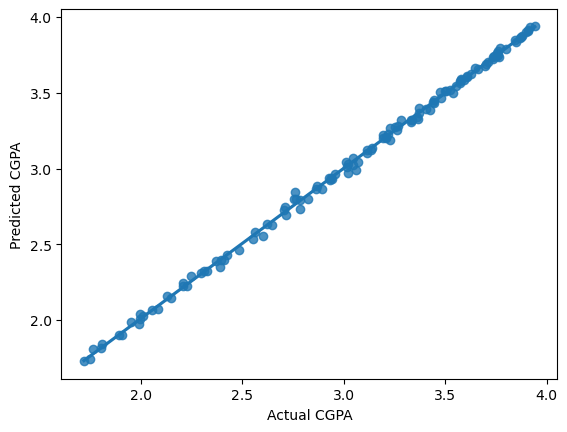

In [81]:
sns.regplot(x=y_test[:],y=load_model.predict(x_test)[:])
plt.xlabel('Actual CGPA')
plt.ylabel('Predicted CGPA')